In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
np.log(1+np.e)

1.3132616875182228

In [2]:
G = nx.karate_club_graph()

In [3]:
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

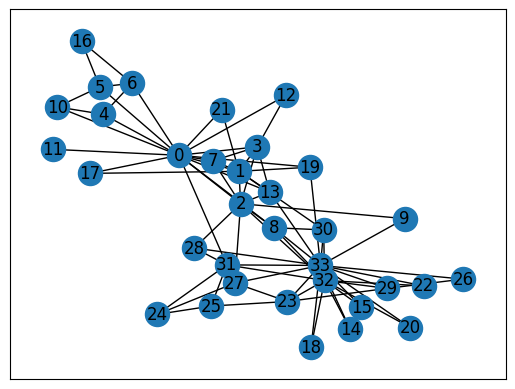

In [4]:
nx.draw_networkx(G, with_labels=True)

In [5]:
v0 = 0
v1 = 33

In [6]:

def getNeighborhood(origin, n_step):
    neigh = {0:[origin]}
    visited = set([origin])
    for i in range(1,n_step+1):
        neigh[i] = []
        que = neigh[i-1]
        for node_ in que:
            neighbor_nodes = set([node for node, data in dict(G[node_]).items()])
            neighbor_nodes = neighbor_nodes.difference(visited)
            visited = visited.union(neighbor_nodes)
            neigh[i].extend(list(neighbor_nodes))
    return neigh

In [7]:
v0_neigh = getNeighborhood(v0,3)

In [8]:
v1_neigh = getNeighborhood(v1,3)

In [68]:
pos = nx.spring_layout(G)

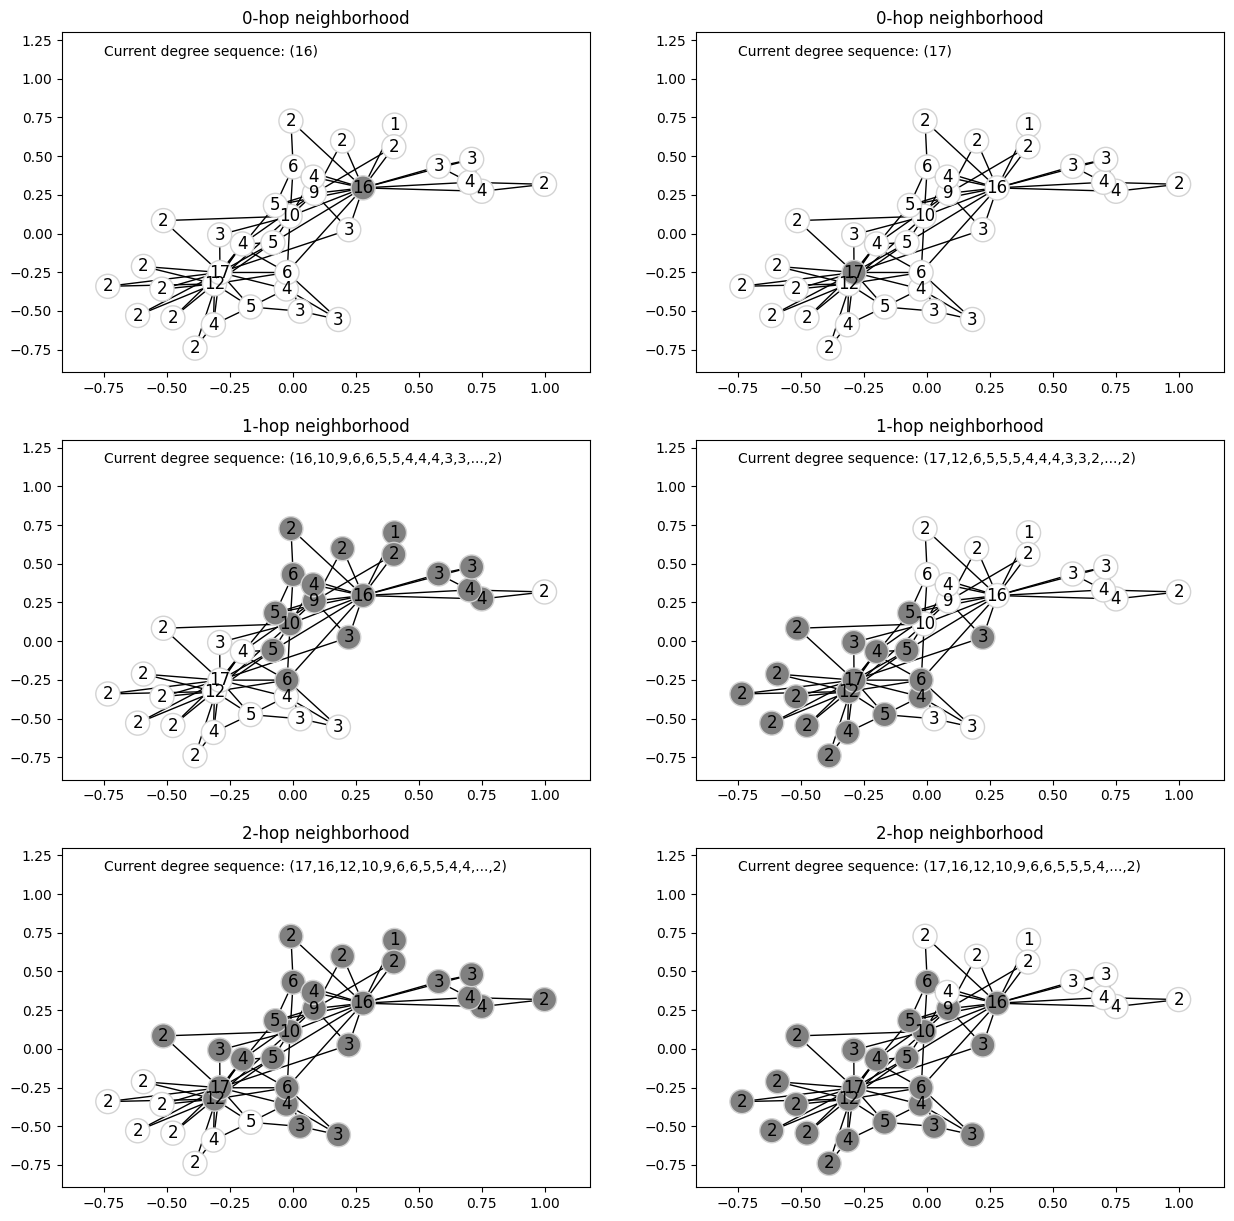

In [71]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
# pos = nx.spring_layout(G)
node2degree = dict(nx.degree(G))

# All nodes are set to white initially
node_colors = {}
for node in G.nodes():
    node_colors[node] = "white"

# Each column will color different nodes dependent on the origin node
node_colors_v0 = node_colors.copy()
node_colors_v1 = node_colors.copy()

# For readability I create a function for getting degree sequence
def getDegreeSeq(list_of_nodes):
    degrees_ = sorted([str(node2degree[node_]) for node_ in list_of_nodes], reverse=True, key=lambda x: int(x))
    degrees_ = ",".join(degrees_)
    if len(degrees_) > 30:
        degrees_start = degrees_[:25]
        if degrees_start[-1] != ",":
            degrees_start = degrees_start + ","
        degrees_end = degrees_[-3]
        if degrees_end[0] != ",":
            degrees_end = "," + degrees_end
        degrees_ = degrees_start + "..." + degrees_end
    return "Current degree sequence: (" + degrees_ + ")"

deg_seq_v0 = []
deg_seq_v1 = []

for i in range(3):
    v0_nodes_ = v0_neigh[i]
    v1_nodes_ = v1_neigh[i]
    deg_seq_v0.extend(v0_nodes_)
    deg_seq_v1.extend(v1_nodes_)

    for node_ in v0_nodes_:
        node_colors_v0[node_] = "grey"
    for node_ in v1_nodes_:
        node_colors_v1[node_] = "grey"
    

    nx.draw_networkx(G, with_labels=True, node_color= node_colors_v0.values(), ax=ax[i,0], edgecolors="lightgrey", pos=pos, labels=node2degree, hide_ticks=False)
    nx.draw_networkx(G, with_labels=True, node_color= node_colors_v1.values(), ax=ax[i,1], edgecolors="lightgrey", pos=pos, labels=node2degree, hide_ticks=False)

    ax[i,0].set_title(f"{i}-hop neighborhood")
    ax[i,1].set_title(f"{i}-hop neighborhood")

    v0_ds_text = getDegreeSeq(deg_seq_v0)
    v1_ds_text = getDegreeSeq(deg_seq_v1)
    ax[i,0].text(-0.75,1.15, v0_ds_text, zorder=10)
    ax[i,1].text(-0.75,1.15, v1_ds_text, zorder=10)
    
    ax[i,0].set_ylim(ymax=1.3)
    ax[i,1].set_ylim(ymax=1.3)
plt.savefig("karateGraph.jpg")
plt.draw()

In [63]:
# fig, ax = plt.subplots(2,2,figsize=(15,15))

# for i in range(4):
#     row_ = i//2
#     column_ = np.mod(i,2)
#     v0_neigh = getNeighborhood(v0,i)
#     node_colors = {}
#     for node in G.nodes():
#         node_colors[node] = "lightgrey"
#     for layer, list_of_nodes in v0_neigh.items():
#         color = cmap(layer*2)
#         for node_ in list_of_nodes:
#             node_colors[node_] = color
#     n_colors = [color for color in node_colors.values()]
#     nx.draw_networkx(G, with_labels=True, node_color= n_colors, ax=ax[row_,column_])
#     ax[row_,column_].set_title(f"{i}-hop neighborhood")
# plt.savefig("khop_graphs.jpg")

- Label with degree
- Color white for non-active and grey for active
- Find a way to add degree sequence vector
- One column for v and one for u
- Final product hyper graph with two nodes